# Pixel Modeling Demonstration

This notebook walks through a few of the functions available in the *pixel_modeling.py* script. Its purpose is to give folks an idea of what kind of image effects are possible! 

I want to emphasize that I've just chosen a few arbitrary examples here, all of the fun is in experimenting with different ways of modeling or altering pixel values and just messing around to see what kind of results you get. For the modeling approaches, I actually think that you can learn a lot about differences between modeling algorithms by comparing results between them.

## Getting Started

 First let's import the all the libraries and functions.

In [52]:
# import pixel modeling libraries and functions
import os
os.chdir(os.path.dirname(os.getcwd()) + '/code')
from pixel_modeling import *

Now, let's import an example image. We will stick with grayscale because I haven't made is much progress with color images (which I think will be much more exciting because of the extra dimension and add room for model error!).

In [53]:
# navigate to data directory
os.chdir(os.path.dirname(os.getcwd()) + '/data')

# open and process image
img1 = processImage('img1.jpg', grayscale = True)

Let's take a look at our original image.

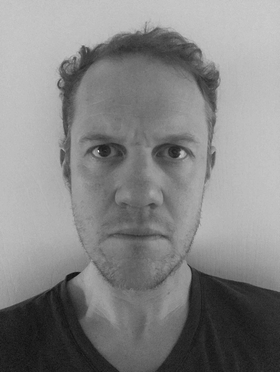

In [54]:
img1

Wow! Look at that handsome, though perhaps a bit stern-looking, fellow!

## Index Modeling

Okay, the first modeling approach we will explore models pixel values as a function of their location (i.e. indices) within the image. Because we are using a grayscale image, our image is simply a two-dimensional array of pixel values. Thus, we only need two features to describe the location of each pixel (i.e., its row and column indices). However, one way to allow for more flexible relationships between position and pixel values is to include polynomial terms for each dimensional coordinate as well as interaction terms between the dimensions. Specifically, the `poly_degree` allows us to specify the degree of polynomials we would like; specificying a degree > 1 will automatically include interactions between the dimensions.

The getIndexData() function not only tranlates our image into a feature matrix corresponding to the position of each pixel and an output vector corresponding to pixel values, but also allows us to include polynomial terms of a specified degree. 

Let's start basic positional features with no polynomial terms or interactions.

In [55]:
X, y = getIndexFeatures(img1, poly_degree = 1)

Okay, we've got our feature matrix and outcome vector, now it's time to model the relationship between the two. The modelIndexWarp() allows us to do this by providing the featurs and outcomes and setting just a few parameters. 

The `prop_row` parameter specifies the proportion of pixels we would like to use during training. The smaller the proportion, the more the model will have to extrapolate when attempting to reconstruct (i.e., predict) the entire image--this is factor that can lead to cool effects.

The `mod` parameter is where we specify what algorithm we would like to use to model the relationship between our features and our outcome. The current options are Random Forest ('rf'), gradient boosted decision trees ('xgb'), k-nearest neighbors ('knn'), and extremely randomized trees ('it'). Part of the fun is how results from the different models compare.

The `nbs` parameter is only relevant if k-nearest neighbors (KNN) is selected for the model, and this parameter specifies the number of neighbors to be used by the algorithm.

The `og_image_shape` parameter is just helpful for reconstructing the original image size.

Let's start with KNN, with a very low proportion of pixels for training, and only 1 neighbor.

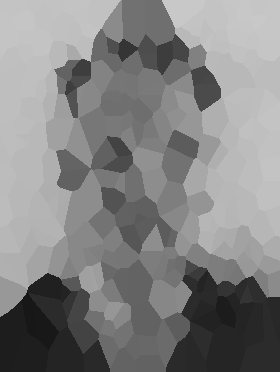

In [56]:
knn1 = modelIndexWarp(X, y, prop_row = 0.003,
                      mod = 'knn', nbs = 1, 
                      og_image_shape = asarray(img1).shape)
knn1

Woah! Let's tinker a bit with different numbers of neighbors for the KNN algorithm, different algorithms alltogether, and different proportions of pixels for training.

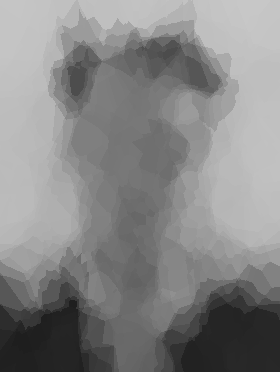

In [57]:
knn2 = modelIndexWarp(X, y, prop_row = 0.003,
                      mod = 'knn', nbs = 5, 
                      og_image_shape = asarray(img1).shape)
knn2

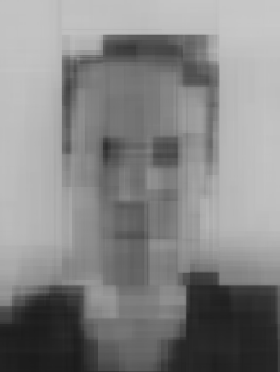

In [58]:
rf1 = modelIndexWarp(X, y, prop_row = 0.01,
                     mod = 'rf',
                     og_image_shape = asarray(img1).shape)
rf1

Let's incorporate polynomial terms and interactions into our feature matrix and try a different algorithm

In [59]:
X_poly = getIndexFeatures(img1, poly_degree = 10, include_y = False)

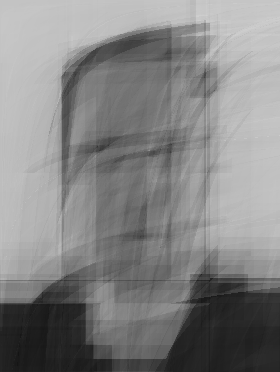

In [60]:
xgb1 = modelIndexWarp(X_poly, y, prop_row = 0.01,
                      mod = 'xgb',
                      og_image_shape = asarray(img1).shape)
xgb1

## Linear Regression

Now, let's take a different approach at modeling pixel values. Here we will model columns of pixel values as a functions of pixel values in other columns.

The LRWarp() function allows us to do this simply by providing an image, specifying the proportion of rows and columns we would like to use as training data (using `prop_row` and `pro_col` respectively), the number of iterations (more iterations makes for smoother images).

Let's check out a few variations

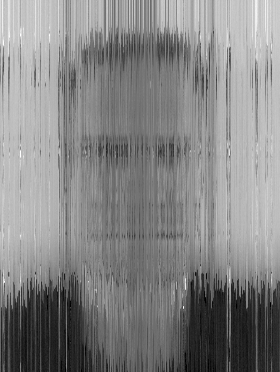

In [61]:
lr1 = lrWarp(img1, prop_row = 0.2, prop_col = 0.01, 
             iterations = 1, verbose = False)
lr1

A single iteration creates an interesting effect, but it's a bit coarse for my tastes, let's increase the number of iterations and see if we can create a smoother image.

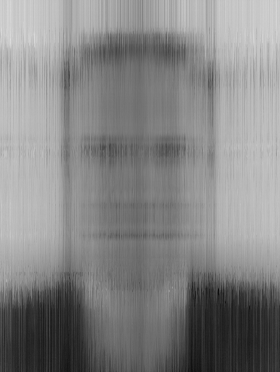

In [62]:
lr2 = lrWarp(img1, prop_row = 0.2, prop_col = 0.01, 
             iterations = 10, verbose = False)
lr2

## Permutations

Let's move away from modeling and see what happens when we permute rows or columns of pixels. Specifically the `permutationWarp` function breaks the image into randomly sized blocks of columns or rows (where you can specify the maximum block size as a proportion of the image size), and randomly permute the columns or rows within each block.

Again, incresasing iterations creates a smoother image. Here's an example over 100 iterations.

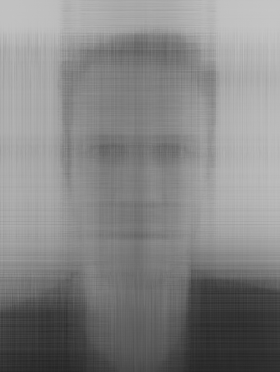

In [63]:
perm1 = permutationWarp(img1, iterations = 100, max_block_prop = 0.75)
perm1

## Wrapping Up

Let's first save our results.

In [64]:
os.chdir(os.path.dirname(os.getcwd()) + '/results')
knn1.save('knn1.jpg')
knn2.save('knn2.jpg')
rf1.save('rf1.jpg')
xgb1.save('xgb1.jpg')
lr1.save('lr1.jpg')
lr2.save('lr2.jpg')
perm1.save('perm1.jpg')

This is just a tiny demonstration of what kinds of things are possible. To start, you can tweak the various parameters of the functions I demonstrated above, or you can get straight to your own experiments, thinking of new ways to model pixel values, applying different algorithms, etc.

I hope you have fun exploring! If you want to see some additional ideas, check out the *experimentation.ipynb* or corresponding report. 